# Reproducibility

## Setup

- Import the necessary Python libraries 

In [1]:
import pandas as pd # package to work with tabular data
import numpy as np # mathematical operations on arrays

- Get the data

In [ ]:
!wget https://github.com/patricia-ternes/water-wiser-2023/blob/main/data/raw/iris1.csv

## Open a file

In [2]:
df = pd.read_csv('data/raw/iris1.csv')
# df = pd.read_csv('data/raw/iris2.csv')

## Looking the content

Notes:

- Axis 0 = Row
- Axis 1 = Column
- Head = First 5 rows
- Tail = Last 5 rows

In [3]:
df.head() # show the first 5 rows

,petal_length,petal_width,sepal_length,sepal_width,species
0,3.3,1.0,4.9,2.4,versicolor
1,1.4,0.2,5.5,4.2,setosa
2,1.5,0.2,5.1,3.4,setosa
3,4.7,1.6,6.3,3.3,versicolor
4,1.6,0.2,4.8,3.4,setosa


In [4]:
df.tail() # show the last 5 rows

,petal_length,petal_width,sepal_length,sepal_width,species
32,1.9,0.4,5.1,3.8,setosa
33,5.8,1.6,7.2,3.0,virginica
34,5.0,1.5,6.0,2.2,virginica
35,5.6,2.4,6.7,3.1,virginica
36,4.6,1.5,6.5,2.8,versicolor


In [5]:
df.shape

(37, 5)

## Data Operations

- Operation on Columns
- Summary statistics
- Selection of columns
- Filtering
- If/Then logic
- Sorting by Values
- Rearranging columns

### Operations on columns

In [6]:
# sepal operation
df["sepal_mean"] = df[['sepal_length', 'sepal_width']].mean(axis=1)

# petal operation
df["petal_mean"] = df[['petal_length', 'petal_width']].mean(axis=1)

# cross operation
df["cross"] = np.sqrt(df['petal_mean']**2 + df['sepal_mean']**2)


### Summary statistics: Global

- Show the statistic results for every column (variable)

In [7]:
df.describe()

,petal_length,petal_width,sepal_length,sepal_width,sepal_mean,petal_mean,cross
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,3.735135,1.156757,5.897297,3.045946,4.471622,2.445946,5.196173
std,1.680975,0.736938,0.710042,0.529462,0.422877,1.198343,0.751196
min,1.200000,0.200000,4.500000,2.000000,3.400000,0.700000,3.492850
25%,1.700000,0.300000,5.400000,2.700000,4.200000,0.950000,4.579574
50%,4.400000,1.300000,5.800000,3.000000,4.500000,2.900000,5.145143
75%,5.000000,1.600000,6.500000,3.400000,4.850000,3.350000,5.741298
max,6.300000,2.500000,7.300000,4.200000,5.100000,4.100000,6.512488


### Group

- Group the rows by one variable

In [8]:
grouped_df = df.groupby("species")

### Summary statistics: Groups

- Show the statistics results by Group (`species`) and all variables

In [9]:
grouped_df.describe()

petal_length                                                    \
                  count      mean       std  min    25%   50%    75%  max   
species                                                                     
setosa             12.0  1.508333  0.202073  1.2  1.375  1.50  1.625  1.9   
versicolor         15.0  4.326667  0.484719  3.3  4.100  4.50  4.650  5.1   
virginica          10.0  5.520000  0.391010  5.0  5.275  5.55  5.675  6.3   

           petal_width            ... petal_mean       cross            \
                 count      mean  ...        75%   max count      mean   
species                           ...                                    
setosa            12.0  0.233333  ...     0.9125  1.15  12.0  4.491430   
versicolor        15.0  1.326667  ...     3.0500  3.35  15.0  5.187568   
virginica         10.0  2.010000  ...     3.9625  4.10  10.0  6.054772   

                                                                        
                 std       min       25%       50%       75%       max  
species                                                                 
setosa      0.389607  3.492850  4.363881  4.551086  4.660676  4.949747  
versicolor  0.510395  4.160829  4.959045  5.161395  5.576268  5.798276  
virginica   0.430104  5.231873  5.992442  6.165734  6.319208  6.512488  

[3 rows x 56 columns]

### Summary statistics: Selection of columns

- Choose one variable

In [10]:
df["cross"].describe()

count    37.000000
mean      5.196173
std       0.751196
min       3.492850
25%       4.579574
50%       5.145143
75%       5.741298
max       6.512488
Name: cross, dtype: float64

- Choose more than one variable

In [11]:
grouped_df[["sepal_length", "petal_length"]].describe()

sepal_length                                                  \
                  count      mean       std  min   25%  50%    75%  max   
species                                                                   
setosa             12.0  5.241667  0.370401  4.5  5.10  5.2  5.500  5.8   
versicolor         15.0  5.960000  0.564168  4.9  5.65  6.0  6.400  6.7   
virginica          10.0  6.590000  0.490918  5.7  6.40  6.7  6.775  7.3   

           petal_length                                                    
                  count      mean       std  min    25%   50%    75%  max  
species                                                                    
setosa             12.0  1.508333  0.202073  1.2  1.375  1.50  1.625  1.9  
versicolor         15.0  4.326667  0.484719  3.3  4.100  4.50  4.650  5.1  
virginica          10.0  5.520000  0.391010  5.0  5.275  5.55  5.675  6.3

### Filtering

- Create a filter based in some condition

In [12]:
N = df["cross"].mean()
N

5.196172810518457

In [13]:
filter = df["sepal_length"] < N
filter

0      True
1     False
2      True
3     False
4      True
5      True
6     False
7      True
8     False
9     False
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
33    False
34    False
35    False
36    False
Name: sepal_length, dtype: bool

The above statement is simply a Series of True/False objects

- Passing `filter` to the DataFrame is going to return all rows with True.

In [14]:
filtered_df = df[filter]
filtered_df.head()

,petal_length,petal_width,sepal_length,sepal_width,species,sepal_mean,petal_mean,cross
0,3.3,1.0,4.9,2.4,versicolor,3.65,2.15,4.236154
2,1.5,0.2,5.1,3.4,setosa,4.25,0.85,4.334167
4,1.6,0.2,4.8,3.4,setosa,4.10,0.90,4.197618
5,3.5,1.0,5.0,2.0,versicolor,3.50,2.25,4.160829
7,1.4,0.2,5.1,3.5,setosa,4.30,0.80,4.373786


### If/then logic

In [15]:
df["size"] = np.where(filter, "small", "large")

### Working with Columns

1. Removing (`drop`) columns
2. Rename
3. Rearranging


In [16]:
# List column names
df.columns

Index(['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'species',
       'sepal_mean', 'petal_mean', 'cross', 'size'],
      dtype='object')

In [17]:
# 1. drop columns
df = df.drop(["sepal_mean", "petal_mean", "cross"], axis=1)

In [18]:
# 2. Renaming

# Define name dict
names = {
    'species': 'Species', 
    'size': 'Size'
}

# Rename based on dict
df = df.rename(columns=names)

In [19]:
# 3. Rearranging
df = df[['Species', 'Size', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

In [20]:
df.head()

,Species,Size,petal_length,petal_width,sepal_length,sepal_width
0,versicolor,small,3.3,1.0,4.9,2.4
1,setosa,large,1.4,0.2,5.5,4.2
2,setosa,small,1.5,0.2,5.1,3.4
3,versicolor,large,4.7,1.6,6.3,3.3
4,setosa,small,1.6,0.2,4.8,3.4


## Plotting

In [21]:
import seaborn as sns
sns.set_theme()

### Statistical graphics

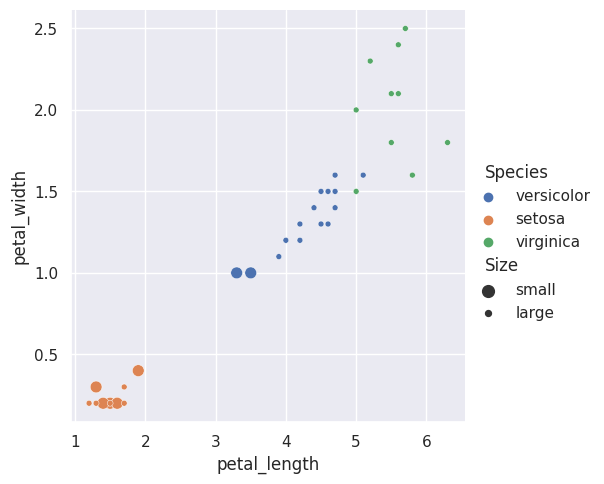

In [22]:
# Scatter plot
sns.relplot(
    data=df, x="petal_length", y="petal_width", hue="Species", size="Size"
)

# Other options: style, row, col

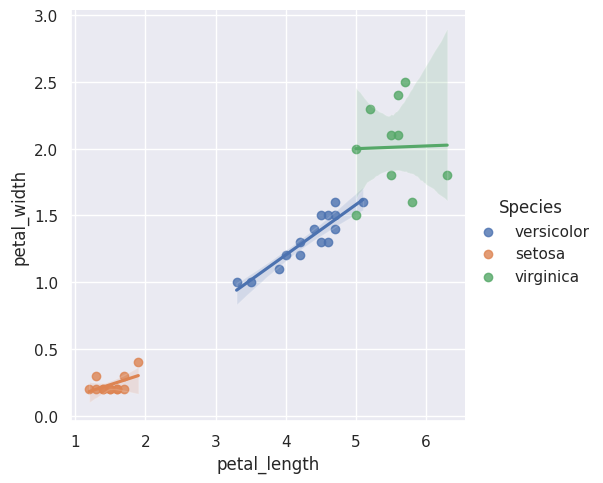

In [23]:
# Linear Regression with uncertainty
sns.lmplot(
    data=df, x="petal_length", y="petal_width", hue="Species"#, col="Size"#, style="Species"
)

### Distributional representations

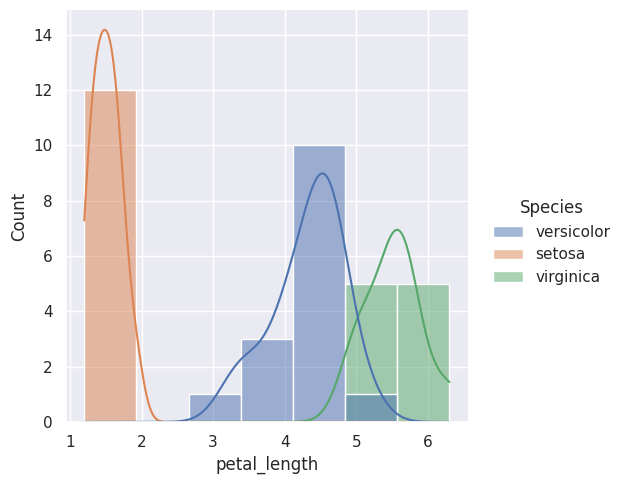

In [24]:
sns.displot(data=df, x="petal_length", hue="Species", kde=True)


### Plots for categorical data

- swarm
- violin
- bar (with error bar!)
- box

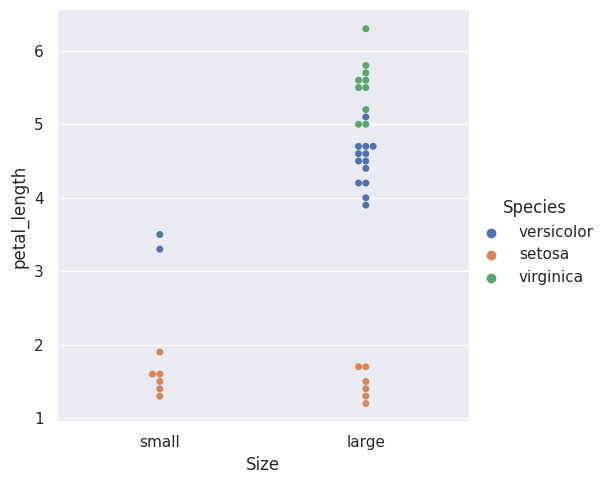

In [25]:
sns.catplot(data=df, kind="swarm", x="Size", y="petal_length", hue="Species")

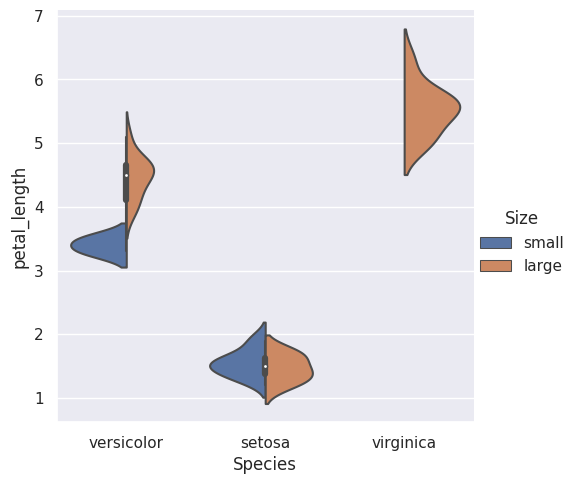

In [26]:
sns.catplot(data=df, kind="violin", x="Species", y="petal_length", hue="Size", split=True)

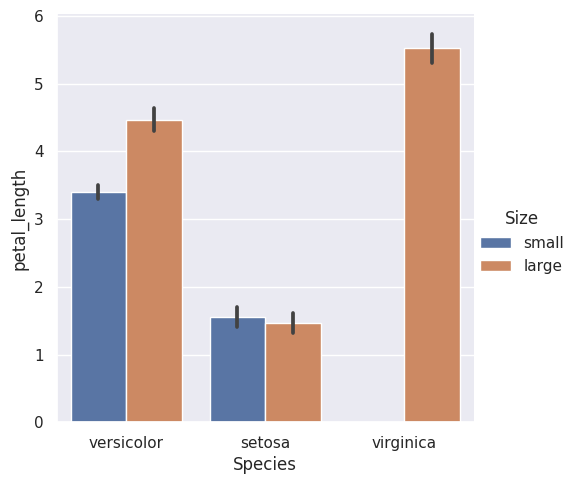

In [27]:
sns.catplot(data=df, kind="bar", x="Species", y="petal_length", hue="Size")

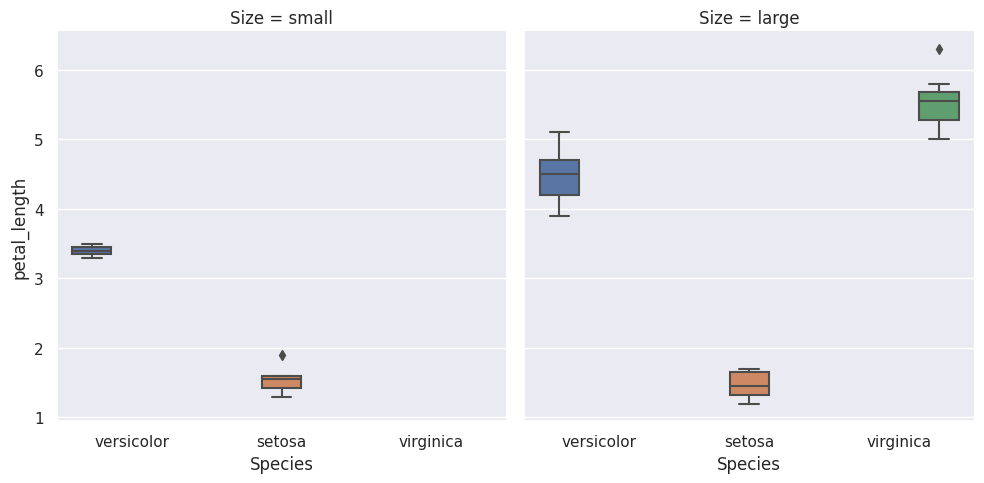

In [28]:
sns.catplot(data=df, x="Species", y="petal_length", kind="box", hue="Species", col="Size")

### Multivariate views on complex datasets

- Single pair relationship (jointplot)
- All pairwise relationship (pairplot)
- Correlation (Pearson, Kendall, Spearman)

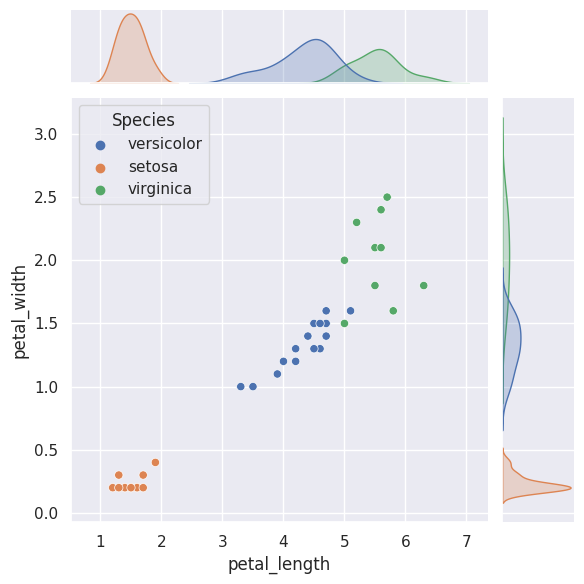

In [29]:
sns.jointplot(data=df, x="petal_length", y="petal_width", hue="Species")

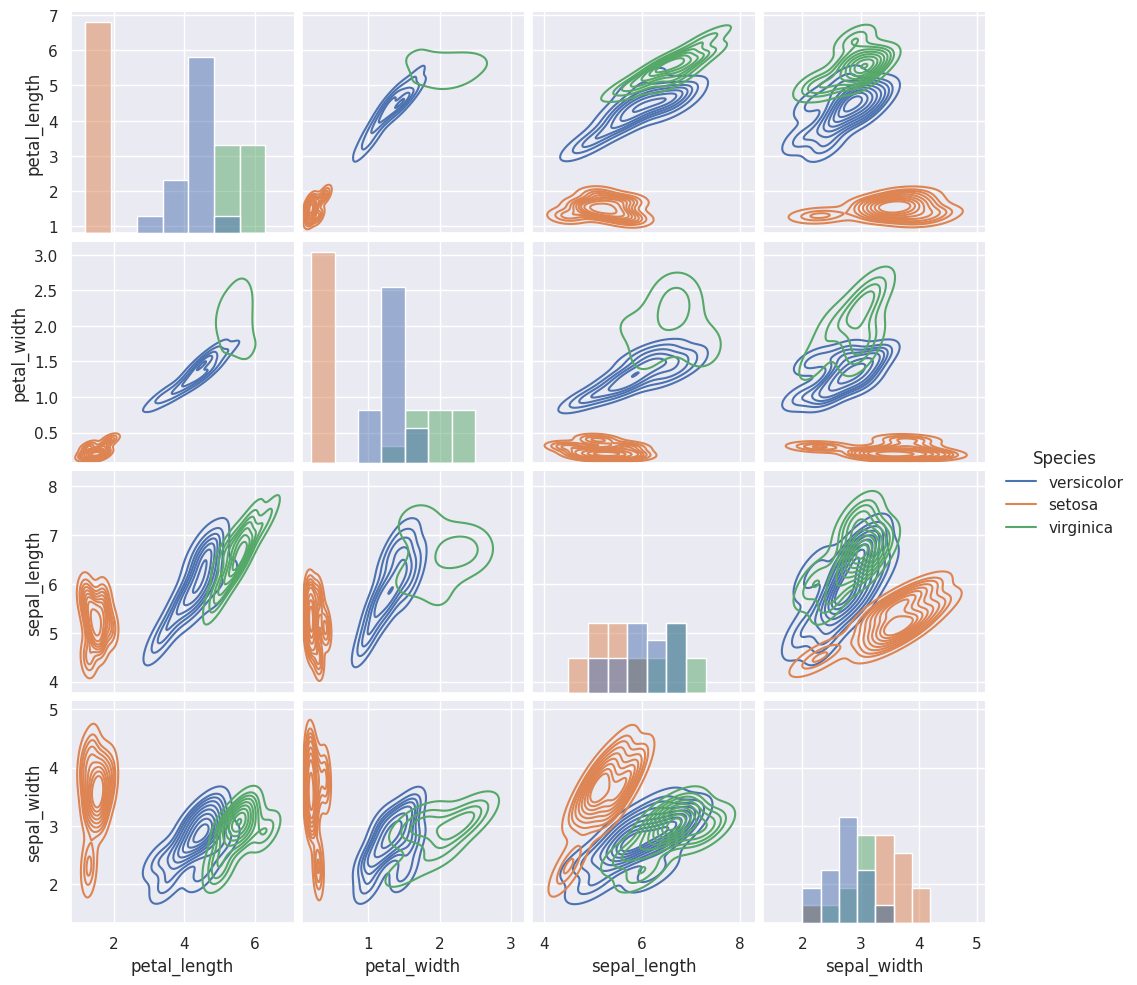

In [30]:
sns.pairplot(data=df, hue="Species", kind="kde", diag_kind="hist")

<Axes: >

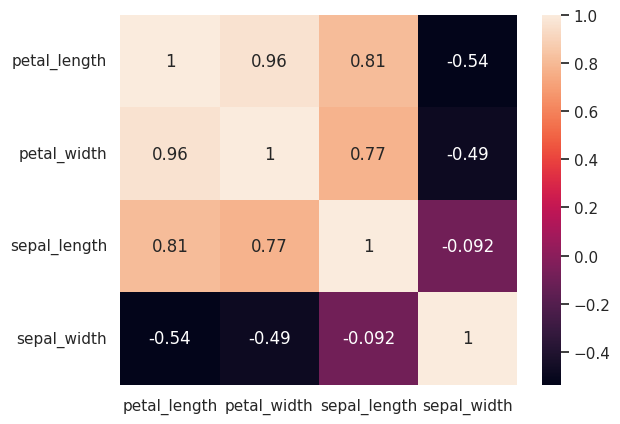

In [31]:
# Use pandas to calculate correlation
corr = df[['petal_length', 'petal_width', 'sepal_length', 'sepal_width']].corr(method='pearson') # method{'pearson', 'kendall', 'spearman'}

# Use seaborn to plot
sns.heatmap(corr, annot=True)

# Automation

- Create a unique dataframe combining iris1 and iris2
- Break the `petal_length` in chunks of 1 from 1 to 7
- For every chunk create the label `size`
- Clean and organize the dataframe as presented above
- For every dataframe, create a displot
- Save the filtered dataframe in a `.csv` file
- Save the plot as a `png` image

In [32]:
df1 = pd.read_csv('data/raw/iris1.csv')
df2 = pd.read_csv('data/raw/iris2.csv')
df = pd.concat([df1, df2]).reset_index(drop=True)

In [33]:
filter = (df["petal_length"] >= 1) & (df["petal_length"] <2)

In [34]:
filtered_df = df[filter]

In [ ]:
# sepal operation
filtered_df["sepal_mean"] = filtered_df[['sepal_length', 'sepal_width']].mean(axis=1)

# petal operation
filtered_df["petal_mean"] = filtered_df[['petal_length', 'petal_width']].mean(axis=1)

# cross operation
filtered_df["cross"] = np.sqrt(filtered_df['petal_mean']**2 + filtered_df['sepal_mean']**2)

# if/then
N = filtered_df["cross"].mean()
filter = filtered_df["sepal_length"] < N
filtered_df["size"] = np.where(filter, "small", "large")

In [36]:
# 1. drop columns
filtered_df = filtered_df.drop(["sepal_mean", "petal_mean", "cross"], axis=1)

# 2. Renaming
# Define name dict
names = {
    'species': 'Species', 
    'size': 'Size'
}
# Rename based on dict
filtered_df = filtered_df.rename(columns=names)

# 3. Rearranging
filtered_df = filtered_df[['Species', 'Size', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

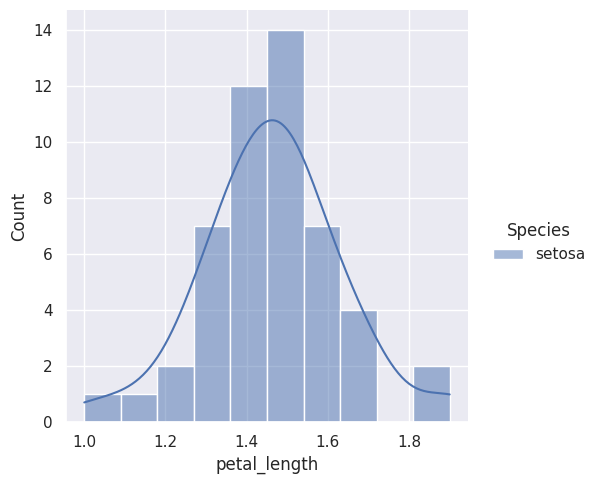

In [37]:
sns.displot(data=filtered_df, x="petal_length", hue="Species", kde=True).savefig("dist_iris_filter_1.png", dpi=300)

In [38]:
filtered_df.to_csv("iris_filter_1.csv")

### Generalise!

In [ ]:
for i in range(1, 7):
    filter = (df["petal_length"] >= i) & (df["petal_length"] <i+1)
    filtered_df = df[filter]
    # sepal operation
    filtered_df["sepal_mean"] = filtered_df[['sepal_length', 'sepal_width']].mean(axis=1)

    # petal operation
    filtered_df["petal_mean"] = filtered_df[['petal_length', 'petal_width']].mean(axis=1)

    # cross operation
    filtered_df["cross"] = np.sqrt(filtered_df['petal_mean']**2 + filtered_df['sepal_mean']**2)

    # if/then
    N = filtered_df["cross"].mean()
    filter = filtered_df["sepal_length"] < N
    filtered_df["size"] = np.where(filter, "small", "large")

    # 1. drop columns
    filtered_df = filtered_df.drop(["sepal_mean", "petal_mean", "cross"], axis=1)

    # 2. Renaming
    # Define name dict
    names = {
        'species': 'Species', 
        'size': 'Size'
    }
    # Rename based on dict
    filtered_df = filtered_df.rename(columns=names)

    # 3. Rearranging
    filtered_df = filtered_df[['Species', 'Size', 'petal_length', 'petal_width', 'sepal_length', 'sepal_width']]

    sns.displot(data=filtered_df, x="petal_length", hue="Species", kde=True).savefig("reports/figures/dist_iris_filter_" + str(i) +".png", dpi=300)
    filtered_df.to_csv("data/processed/iris_filter_" + str(i) +".csv")

# Going beyond: Machine Learning

In [40]:
df1 = pd.read_csv('data/raw/iris1.csv')
df2 = pd.read_csv('data/raw/iris2.csv')
df = pd.concat([df1, df2]).reset_index(drop=True)

In [41]:
label = df.pop("species")

In [42]:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,label,test_size=.5)

In [44]:
clf = classifier.fit(x_train,y_train)

In [45]:
predictions=classifier.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predictions))

0.9333333333333333


In [47]:
# Here is some example input and expected classes you can try above
predict_x = {
    'petal_length': [1.7, 4.2, 5.4],
    'petal_width': [0.5, 1.5, 2.1],
    'sepal_length': [5.1, 5.9, 6.9],
    'sepal_width': [3.3, 3.0, 3.1],
}
predict_x = pd.DataFrame(predict_x)
expected = ['setosa', 'versicolor', 'virginica']

In [48]:
predictions=classifier.predict(predict_x)
print(predictions)

['setosa' 'versicolor' 'virginica']
